# Модель оценки эффективности восстановления золота
## Сборный проект по модулю Машинное обучение

### Введение

Необходимо разработать прототип модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. В распоряжении данные с параметрами добычи и очистки. Модель нацелена на оптимизацию производства, чтобы не запускать предприятие с убыточными характеристиками.

## 1. Подготовка данных
## 1.1. Загрузка данных

In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Загрузим данные и изучим информацию.

In [192]:
data_train = pd.read_csv(
    '/Users/peterefimov/Dropbox/DS_projects/8. Gold. II module final project./gold_recovery_train.csv')
data_test = pd.read_csv(
    '/Users/peterefimov/Dropbox/DS_projects/8. Gold. II module final project./gold_recovery_test.csv')
data_full = pd.read_csv(
    '/Users/peterefimov/Dropbox/DS_projects/8. Gold. II module final project./gold_recovery_full.csv')

# data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
# data_test  = pd.read_csv('/datasets/gold_recovery_test.csv')
# data_full  = pd.read_csv('/datasets/gold_recovery_full.csv')

In [193]:
print('Обучающие данные')
display(data_train.head(5))
print('Тестовые данные')
display(data_test.head(5))
print('Полные данные')
display(data_full.head(5))

Обучающие данные


date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

Тестовые данные


date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   
2                                 11.962366   
3                                 12.033091   
4                                 12.025367   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   
2                                 -498.767484   
3                                 -498.350935   
4                                 -500.786497   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3     

Полные данные


date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

Посмотрим информацию о данных

In [194]:
print('Обучающие данные')
display(data_train.info())
print('Тестовые данные')
display(data_test.info())
print('Полные данные')
display(data_full.info())

Обучающие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 n

None

Тестовые данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 

None

Полные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-

None

Проверим данные на дубликаты

In [195]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(data_full.duplicated().sum())

0
0
0


Дубликаты не обнаружены. В данных есть много пропущенных значений, также значение даты представлено в формате object. Переведём его в dataframe. Остальные данные в формате float64.

In [196]:
data_train['date'] = data_train['date'].astype('datetime64')
data_test['date'] = data_test['date'].astype('datetime64')
data_full['date'] = data_full['date'].astype('datetime64')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

Формат даты изменён.

## 1.2. Проверка расчёта эффективности обогащения

Проверим правильность расчёта величины rougher.recovery.output в обучающей выборке. Сравним её значение с рассчитанным по формуле.

In [197]:
# Задаём переменную, куда входят значения rougher.recovery.output из обучающей выборки

recovery_train = data_train['rougher.output.recovery']
print(recovery_train.head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


In [198]:
# Задаём функцию, рассчитывающую rougher.output.recovery по формуле из начальных данных

def recovery_calculator(C,F,T):
    return (C * (F-T))/(F*(C-T))*100

# C — доля золота в концентрате после флотации/очистки - rougher.output.concentrate_au;
# F — доля золота в сырье/концентрате до флотации/очистки - rougher.input.feed_au;
# T — доля золота в отвальных хвостах после флотации/очистки - rougher.output.tail_au.

# Вычислим рассчитанные по этой формуле значения rougher.output.recovery и поместим их в переменную

recovery_calculated = recovery_calculator(data_train['rougher.output.concentrate_au'],
                                          data_train['rougher.input.feed_au'],
                                          data_train['rougher.output.tail_au'])

print(recovery_calculated.head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64


Значения выглядят совпадающими. Рассчитаем MAE. Так как MAE не может быть рассчитана на данных с пропусками, возьмём в данном случае строки без пропущенных значений

In [199]:
# Создадим список, в который входят индексы значений rougher.output.recovery без пропусков
nozero_indexes = recovery_train[~recovery_train.isna()].index

# Рассчитаем и выведем MAE:
calculated_error = mean_absolute_error(recovery_calculated[nozero_indexes], 
                                       recovery_train[nozero_indexes])

print(f'МАЕ между расчётной величиной и обучающей выборкой {calculated_error}')

МАЕ между расчётной величиной и обучающей выборкой 9.444891926100695e-15


Ошибка пренебрежимо мала. Считаем значения rougher.output.recovery в обучающей выборке верными.

## 1.3. Анализ признаков, недоступных в тестовой выборке

Определим, какие именно признаки доступны в обучающей, но недоступны в тестовой выборке

In [200]:
# Создаём списки признаков в обучающей и тестовой выборках. 
# Для нахождения их пересечения приведём их к типу множеств set

features_test = set(data_test.columns)
features_train = set(data_train.columns)

# Определим уникальный признаки для train и покажем их
features_unavaiable = features_train - features_test
print(len(features_unavaiable))
display(features_unavaiable)

34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видим, что в тестовой выборке недоступны выходные значения с суффиксом output и расчётные отношения calculation. Можно предположить, что calculated рассчитываются из output, то есть, взаимосвязаны. Предполагаем, что отсутствие этих признаков связано с тем, что они рассчитываются или определаются уже по факту завершённого процесса и не могут быть определены в процессе технологии.

 ## 1.4. Предобработка данных
 ### Обучающая выборка - целевые признаки
 В данных два целевых признака - rougher output и final output. В обоих случаях есть пропуски, которые необходимо обработать. Нам доступна формула, по которой возможно рассчитать целевые признаки из имеющихся. Предыдущий этап показал почти полное совпадение расчётных и реальных значений, поэтому применение формули легитимно. Примем следующую схему:
 1. Заменяем пропуски на величины, рассчитанные по формуле там, где это возможно.
 2. Остальные значения удаляем, т.к. иных достоверных методов замены целевого признака в нашем случае нет.

In [201]:
# Оценим количество пропусков:

print(data_train['rougher.output.recovery'].isna().sum())
print(data_train['final.output.recovery'].isna().sum())

2573
1521


 Для адекватной работы формулы зададим условия для строк:
 
 1. Целевой признак пропущен
 2. Определяющие признаки не пропущены
 3. Определяющие признаки не равны нулю

In [202]:
# (C * (F-T))/(F*(C-T))*100

# C — доля золота в концентрате после флотации/очистки - rougher.output.concentrate_au;
# F — доля золота в сырье/концентрате до флотации/очистки - rougher.input.feed_au;
# T — доля золота в отвальных хвостах после флотации/очистки - rougher.output.tail_au.


conditions_1 = (data_train['rougher.output.recovery'].isna() &
                
                   ~data_train['rougher.output.concentrate_au'].isna() &
                   ~data_train['rougher.input.feed_au'].isna() &
                   ~data_train['rougher.output.tail_au'].isna() &
                
                   (data_train['rougher.input.feed_au'] != 0) &
                   (data_train['rougher.output.tail_au'] != data_train['rougher.output.concentrate_au']))

# Оценим, сколько пропусков попадают под условия:
print(len(data_train[conditions_1]))

260


Применим ранее написанную функцию для расчёта значений и заполнения пропусков:

In [203]:
data_train.loc[conditions_1, 'rougher.output.recovery'] = (
    
    recovery_calculator(data_train[conditions_1]['rougher.output.concentrate_au'],
                        data_train[conditions_1]['rougher.input.feed_au'],
                        data_train[conditions_1]['rougher.output.tail_au'])
)

print(data_train.loc[conditions_1, 'rougher.output.recovery'].isna().sum())

0


260 пропусков целевого признака 'rougher.output.recovery' заполнены

Повторим метод для второго целевого признака final output:

In [204]:
# (C * (F-T))/(F*(C-T))*100

# В случае второго признака формула та же, но определяющие признаки другие

# C — доля золота в концентрате после флотации/очистки - final.output.concentrate_au;
# F — доля золота в сырье/концентрате до флотации/очистки - primary_.input.feed_au;
# T — доля золота в отвальных хвостах после флотации/очистки - rougher.output.tail_au.


conditions_2 = (data_train['final.output.recovery'].isna() &
                
                   ~data_train['final.output.concentrate_au'].isna() &
                   ~data_train['primary_cleaner.output.concentrate_au'].isna() &
                   ~data_train['final.output.tail_au'].isna() &
                
                   (data_train['primary_cleaner.output.concentrate_au'] != 0) &
                   (data_train['final.output.tail_au'] != data_train['final.output.concentrate_au']))

# Оценим, сколько пропусков попадают под условия:
print(len(data_train[conditions_2]))

245


Применим формулу:

In [205]:
data_train.loc[conditions_2, 'final.output.recovery'] = (
    
    recovery_calculator(data_train[conditions_2]['final.output.concentrate_au'],
                        data_train[conditions_2]['primary_cleaner.output.concentrate_au'],
                        data_train[conditions_2]['final.output.tail_au'])
)

print(data_train.loc[conditions_2, 'final.output.recovery'].isna().sum())

0


245 пропусков второго целевого признака заполнены. Оценим количество оставшихся пропусков.

In [206]:
print(len(data_train[(data_train['rougher.output.recovery'].isna()) |
                     (data_train['final.output.recovery'].isna())
                    ]))
print(len(data_train))

2372
16860


Теряем около 14% данных. Так как иных методов по адекватной замене пропусков целевых признаков в данном случае не наблюдается, более безболезненно для дальнейшего обучения моделей будет их удалить. Сделаем:

In [207]:
data_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)

# Проверим
print(len(data_train[(data_train['rougher.output.recovery'].isna()) |
                     (data_train['final.output.recovery'].isna())
                    ]))

0


Пропусков в целевых признаках не осталось.

### Пропуски в остальных признаках

Выведем список признаков, в которых есть пропуски, в порядке убывания количества пропусков:

In [208]:
# Задаём параметр, чтобы на печать вышли все признаки без обрезки
pd.options.display.max_rows = 100

# Выводим признаки с пропусками, суммируем количества пропусков и сортируем по убыванию
print(data_train.isna().sum().sort_values(ascending=False))

secondary_cleaner.output.tail_sol                     1675
rougher.state.floatbank10_e_air                        466
rougher.input.floatbank11_xanthate                     449
primary_cleaner.output.concentrate_sol                 337
final.output.concentrate_sol                           229
secondary_cleaner.state.floatbank2_a_air               221
rougher.input.feed_size                                145
rougher.input.feed_pb                                  127
primary_cleaner.output.concentrate_pb                  118
final.output.tail_pb                                   117
primary_cleaner.input.xanthate                         106
rougher.input.feed_sol                                  97
primary_cleaner.output.tail_sol                         71
rougher.input.floatbank11_sulfate                       44
rougher.output.concentrate_sol                          41
rougher.input.floatbank10_sulfate                       39
primary_cleaner.input.depressant                        

Большая часть пропусков сосредоточена в первых ~20 признаках. Установим лимит в 50 пропусков. Признаки, в которых пропусков больше лимита, будем рассматривать и запишем их в отдельные список, остальные пропуски удалим, не нанеся вреда данным. 

In [209]:
drop_limit = 50

# Создаём список столбцов, у которых больше 50 пропусков

features_drops = list(
    data_train.isna().sum().sort_values(ascending=False)
    [data_train.isna().sum() > drop_limit].index)

display(features_drops)
print(f'Признаков, удовлетворяющих условию {len(features_drops)}')

['secondary_cleaner.output.tail_sol',
 'rougher.state.floatbank10_e_air',
 'rougher.input.floatbank11_xanthate',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.state.floatbank2_a_air',
 'rougher.input.feed_size',
 'rougher.input.feed_pb',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_sol',
 'primary_cleaner.output.tail_sol']

Признаков, удовлетворяющих условию 13


Изучим распределения: построим гистограммы по каждому признаку. Если распределения похожи на нормальные, заменим значения медианами, если нет, рассмотрим другие возможности.

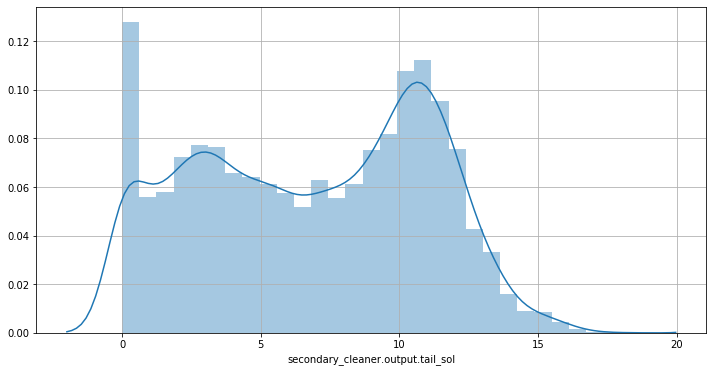

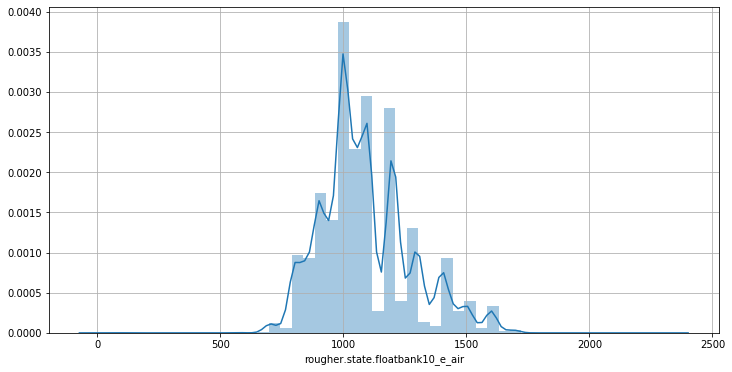

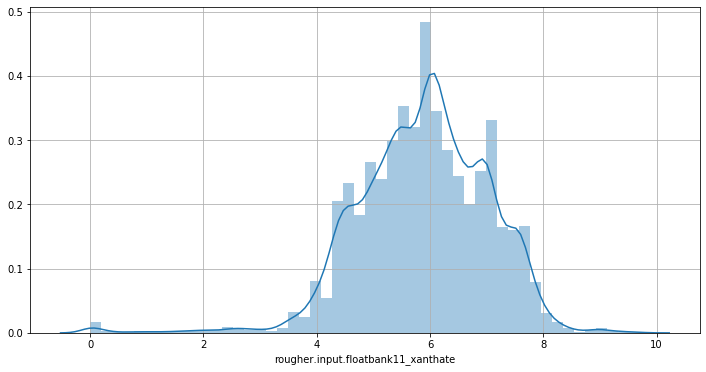

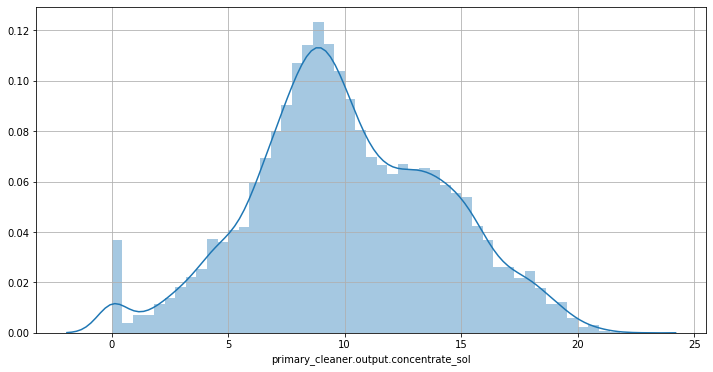

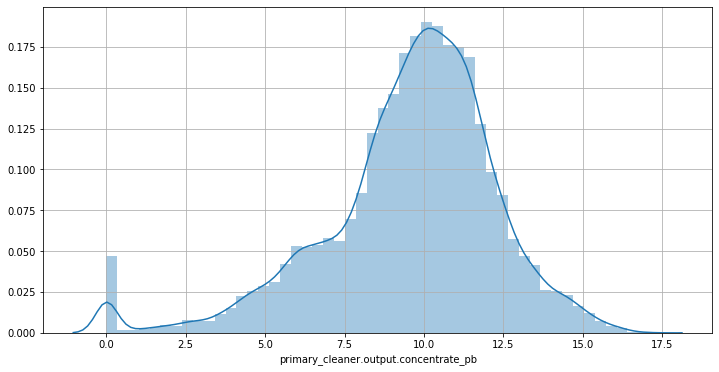

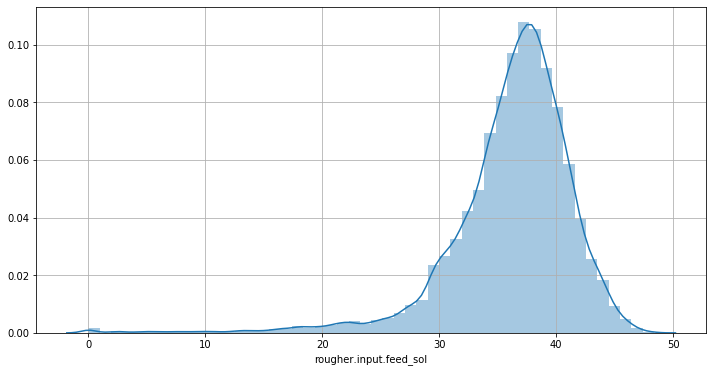

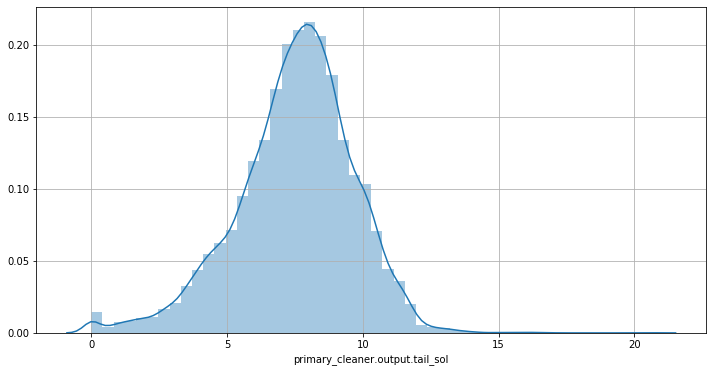

In [210]:
for feature in features_drops:
    plt.figure(figsize=(12,6))
    plt.grid()
    sns.distplot(data_train[feature])
    plt.show()

Во всех случаях кроме двух распределения близки к нормальным, и пропуски могут быть заменены медианами. Отдельно рассмотрим признаки 'secondary_cleaner.output.tail_sol' и 'secondary_cleaner.state.floatbank2_a_air', распределения которых однозначно не являются нормальными, и замена пропусков на медианы в которых будет некорректна. Ещё раз оценим, сколько всего таких пропусков.

In [211]:
print(len(data_train[(data_train['secondary_cleaner.output.tail_sol'].isna()) |
                     (data_train['secondary_cleaner.state.floatbank2_a_air'].isna())
                    ]))
print(len(data_train))

1746
14488


Более 12% датасета. Попробуем найти способ их заменить, не выбрасывая.

### Обработка пропусков в secondary_cleaner.output.tail_sol

Так как данные числовые, оценим возможность заменить пропуски на значения, рассчитанные с помощью дополнительной модели линейной регрессии. Для этого посмотроим тепловую матрицу корреляции и оценим, есть ли признакие, которые помогут определить требуемый:

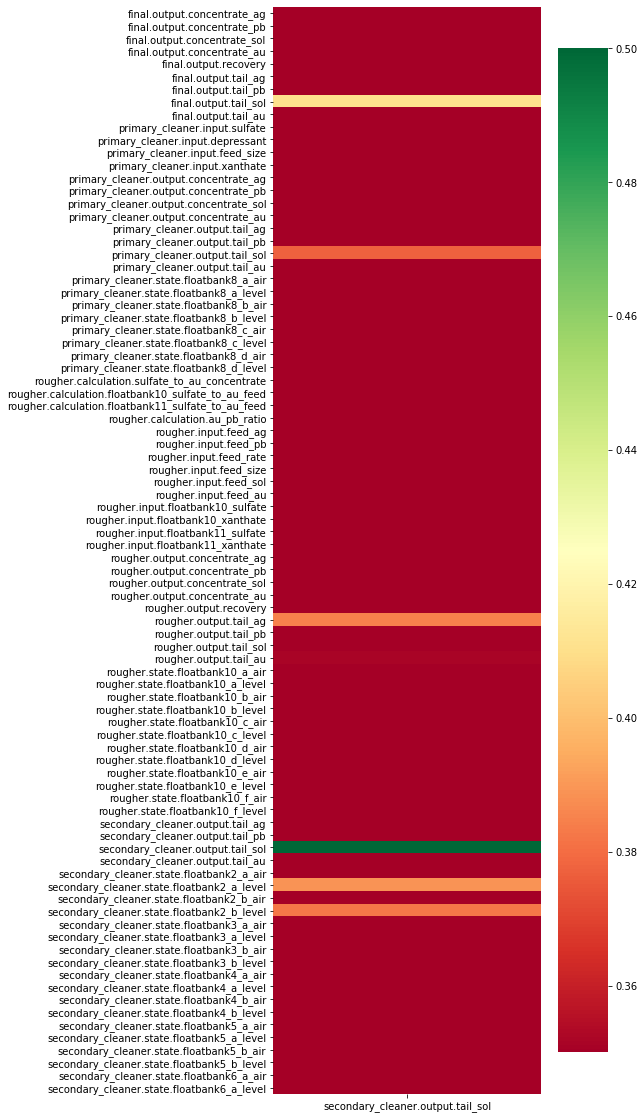

In [248]:
plt.figure(figsize=(6,20))
sns.heatmap(data_train.corr()['secondary_cleaner.output.tail_sol'].to_frame(),            
           vmin=0.35, cmap='RdYlGn', vmax=0.5)
# Параметры тепловой карты подобраны таким образом, чтобы коррелирующие признаки выделялись достаточно ярко
plt.show()

Обнаружили корреляцию между несколькими признаками. Пропуски можно попробовать заменить линейной регрессией. Для обучения модели возьмём 3 наиболее коррелирующих признака, запишем их в отдельный список и добавим в него искомый признак для составления отдельного датасета.

In [213]:
# Делаем список признаков
features_list1 = ['final.output.tail_sol',
                   'primary_cleaner.output.tail_sol',
                   'rougher.output.tail_ag']

# Создаём вспомогательный датасет, убрав из него пропуски для корректного обучения модели
data_train_1 = data_train[features_list1 + ['secondary_cleaner.output.tail_sol']].dropna()
data_train_1.head()

final.output.tail_sol  primary_cleaner.output.tail_sol  \
0              16.904297                         7.476074   
1              16.634514                         6.733907   
2              16.208849                         6.471768   
3              16.532835                         6.843791   
4              16.525686                         6.550154   

   rougher.output.tail_ag  secondary_cleaner.output.tail_sol  
0                5.008018                           8.764648  
1                4.955378                           9.001494  
2                4.843460                           8.842896  
3                4.655288                           9.122857  
4                4.552800                           8.871028

Теперь обучим линейную регрессию на полученном вспомогательном датасете.

In [214]:
LR_1 = LinearRegression()

# Разбиваем данные на x и y
x_train_1 = data_train_1.drop(['secondary_cleaner.output.tail_sol'], axis=1)
y_train_1 = data_train_1['secondary_cleaner.output.tail_sol']

# Масштабируем признаки для корректного обучения модели
x_train_1_scaled = StandardScaler().fit_transform(x_train_1)

# Обучаем модель
LR_1.fit(x_train_1_scaled, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Качество получившейся модели и предсказаний оценим визуально по гистограмме. Считаю в данном случае такого подхода достаточно. Теперь задаём группу условий для применения модели на правильных строках - целевой признак пропущен, определяющие - без пропусков. Далее предсказываем значения и подставляем их в оригинальный датасет.

In [215]:
# Задаём список условий
conditions_3 = (data_train['secondary_cleaner.output.tail_sol'].isna() &
                ~data_train['final.output.tail_sol'].isna() &
                ~data_train['primary_cleaner.output.tail_sol'].isna() &
                ~data_train['rougher.output.tail_ag'].isna())

# Берём срез по условию из оригинальной обучающей выборки
x_for_predict_1 = data_train[conditions_3][features_list1]

# Масштабируем признаки
x_for_predict_1_scaled = StandardScaler().fit_transform(x_for_predict_1)

# Получаем предсказания
predictions_1 = LR_1.predict(x_for_predict_1_scaled)

# Подставляем предсказания в строки с пропущенным целевым признаком в оригинальном датасете
data_train.loc[conditions_3, 'secondary_cleaner.output.tail_sol'] = predictions_1

Пропуски заменены. Повторим гистограмму для оценки обновлённого распределения.

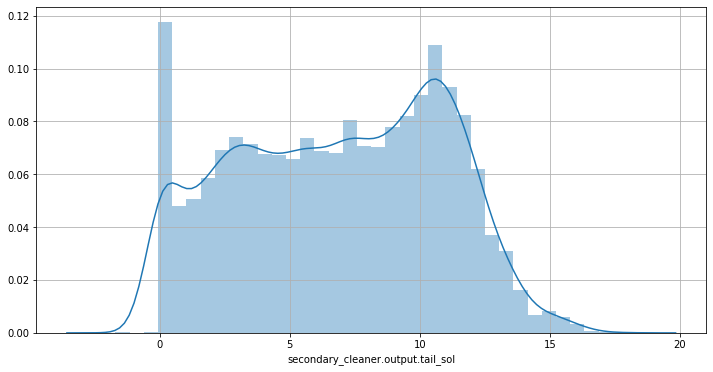

In [216]:
plt.figure(figsize=(12,6))
plt.grid()
sns.distplot(data_train['secondary_cleaner.output.tail_sol'])
plt.show()

Гистограмма похожа на начальную, форма распределения сохранилась. Считаем метод легитимным. Проверим, сколько пропусков в данном признаке осталось.

In [217]:
data_train['secondary_cleaner.output.tail_sol'].isna().sum()

60

Количество пропусков в признаке secondary_cleaner.output.tail_sol удалось значительно сократить. Оставшиеся пока что не трогаем, удалим их вместе с остальными пропусками далее.

### Обработка пропусков в secondary_cleaner.state.floatbank2_a_air

Попробуем применить метод из предыдущего пункта к пропускам в этом признаке. Построим тепловую матрицу.

In [247]:
plt.figure(figsize=(6,20))
sns.heatmap(data_train.corr()['secondary_cleaner.state.floatbank2_a_air'].to_frame(),            
           vmin=0.75, cmap='RdYlGn', vmax=1.0)
# Параметры тепловой карты подобраны таким образом, чтобы коррелирующие признаки выделялись достаточно ярко
plt.show()

В данном случае обнаружили явную корреляцию с одним признаком. Его и будем использовать для модели линейной регрессии. Проверку моделми также осуществим визуально по обновлённой гистограмме.

In [219]:
# Объявляем вторую модель
LR_2 = LinearRegression()

# Составляем вспомогательный датасет
data_train_2 = data_train[['secondary_cleaner.state.floatbank2_a_air',
                          'secondary_cleaner.output.tail_sol']].dropna()
data_train_2.head()

secondary_cleaner.state.floatbank2_a_air  secondary_cleaner.output.tail_sol
0                                 25.853109                           8.764648
1                                 25.880539                           9.001494
2                                 26.005245                           8.842896
3                                 25.942508                           9.122857
4                                 26.024787                           8.871028

In [220]:
# Задаём список признаков для обучения отдельной переменной
features_list2 = ['secondary_cleaner.output.tail_sol']

# Выделяем обучающий признак
x_train_2 = data_train_2[features_list2]

# И целевой
y_train_2 = data_train_2['secondary_cleaner.state.floatbank2_a_air']

# Обучаем модель
LR_2.fit(x_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
# По аналогии с предыдущим случаем задаём группу условий

conditions_4 = (data_train['secondary_cleaner.state.floatbank2_a_air'].isna() &
               ~data_train['secondary_cleaner.output.tail_sol'].isna())

x_for_predict_2 = data_train[conditions_4][features_list2]

predictions_2 = LR_2.predict(x_for_predict_2)

data_train.loc[conditions_4, 'secondary_cleaner.state.floatbank2_a_air'] = predictions_2

Построим обновлённую гистограмму

In [222]:
plt.figure(figsize=(12,6))
plt.grid()
sns.distplot(data_train['secondary_cleaner.state.floatbank2_a_air'])
plt.show()

Картина распределения не нарушена, поэтому замену пропусков считаю легитимной. Проверим, сколько пропусков в этом признаке осталось.

In [223]:
data_train['secondary_cleaner.state.floatbank2_a_air'].isna().sum()

3

Осталось всего 3 пропущенных значения.

### Оставшиеся признаки

Ранее был получен список с признаками, где более 50 пропусков:

In [224]:
features_drops

['secondary_cleaner.output.tail_sol',
 'rougher.state.floatbank10_e_air',
 'rougher.input.floatbank11_xanthate',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.state.floatbank2_a_air',
 'rougher.input.feed_size',
 'rougher.input.feed_pb',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_pb',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_sol',
 'primary_cleaner.output.tail_sol']

Удалим из него признаки, которые только что обработали:

In [225]:
print(len(features_drops))
features_drops.remove('secondary_cleaner.output.tail_sol')
features_drops.remove('secondary_cleaner.state.floatbank2_a_air')
print(len(features_drops))

13
11


Оставшиеся пропуски заполним медианами.

In [226]:
data_train.loc[:,features_drops] = (data_train.loc[:,features_drops].
                                    fillna(data_train.loc[:,features_drops].
                                           median())
                                   )

In [228]:
data_train.isna().sum().sum()

393

Остаётся 393 пропуска, которые придётся удалить. Считаю это допустимым количеством. Удалим.

In [229]:
data_train.dropna(inplace = True)
data_train.isna().sum().sum()

0

Пропуски в обучающей выборке успешно заполнены или удалены.

### Тестовая выборка - обработка пропусков

Оценим количество пропусков в тестовой выборке и как они распределены по признакам.

In [238]:
display(data_test.shape)
display(data_test.dropna().shape)

(5856, 53)

(5383, 53)

Если удалить все строки с пропусками, теряем около 8% датасета. Это некритично и по масштабу сочетается с количеством удалённых данных из обучающей выборки, поэтому в данном случае пропуски можно удалить.

In [240]:
data_test.dropna(inplace=True)

Далее добавим в тестовую выборку целевые признаки, объединенив таблицы по дате. Заодно проверим, будут ли в данном случае пропуски.

In [241]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
                           on = 'date',
                           how = 'left')
display(data_test.head())

date  primary_cleaner.input.sulfate  \
0 2016-09-01 00:59:59                     210.800909   
1 2016-09-01 01:59:59                     215.392455   
2 2016-09-01 02:59:59                     215.259946   
3 2016-09-01 03:59:59                     215.336236   
4 2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3                                 -500.868509   
4                                 -509.526725   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  4.872511   
1                                  4.878850   
2                                  4.905125   
3                                  4.931400   
4                                  4.957674   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.037437   
1                                 -500.162375   
2                                 -499.828510   
3          

Данные успешно объединены. Проверим пропуски.

In [242]:
display(data_test.shape)
display(data_test.dropna().shape)

(5383, 55)

(5229, 55)

Получили чуть менее 3% пропусков, что некритично, и их можно удалить.

In [ ]:
# Повторно удаляем признаки из тестового датасета
data_test.dropna(inplace=True)

Оценим, какая часть данных была потеряна в результате предобработки.

In [246]:
print(f'Начальное количество строк {len(data_full)}')
print(f'Осталось после предобработки {len(data_test) + len(data_train)}')

Начальное количество строк 22716
Осталось после предобработки 19613


Всего потеряно менее 14% данных от общего датасета. Это немало, однако больше пропусков удалось заменить значениями без удаления строк.

## Результат подготовки данных

В ходе подготовки данных:
1. Данные загружены и изучены
2. Проверено совпадение расчётных целевых признаков и взятых из доступных данных. Посчитана MAE между ними.
3. Проанализированы данные, недоступные в тестовой выборке
4. Данные предобработаны

В ходе предобработки обнаружено значительное количество пропусков, бОльшую часть из которых удалось заменить без удаления соответствующих строк следующими значениями:
1. Расчитанными по доступной и проверенной ранее формуле
2. Медианой по датасету с проверкой сохранения начального распределения
3. Вспомогательными моделями линейной регрессии

## 2. Анализ данных
## 2.1. Концентрация Au, Ag, Pb
Изучим, как меняется концентрация металлов на различных этапах очистки. Для этого построим точечные распределения для каждого из металлов. Получим 3 поля графиков, на каждом из которых будет распределение концентрации на 3 технологических этапах

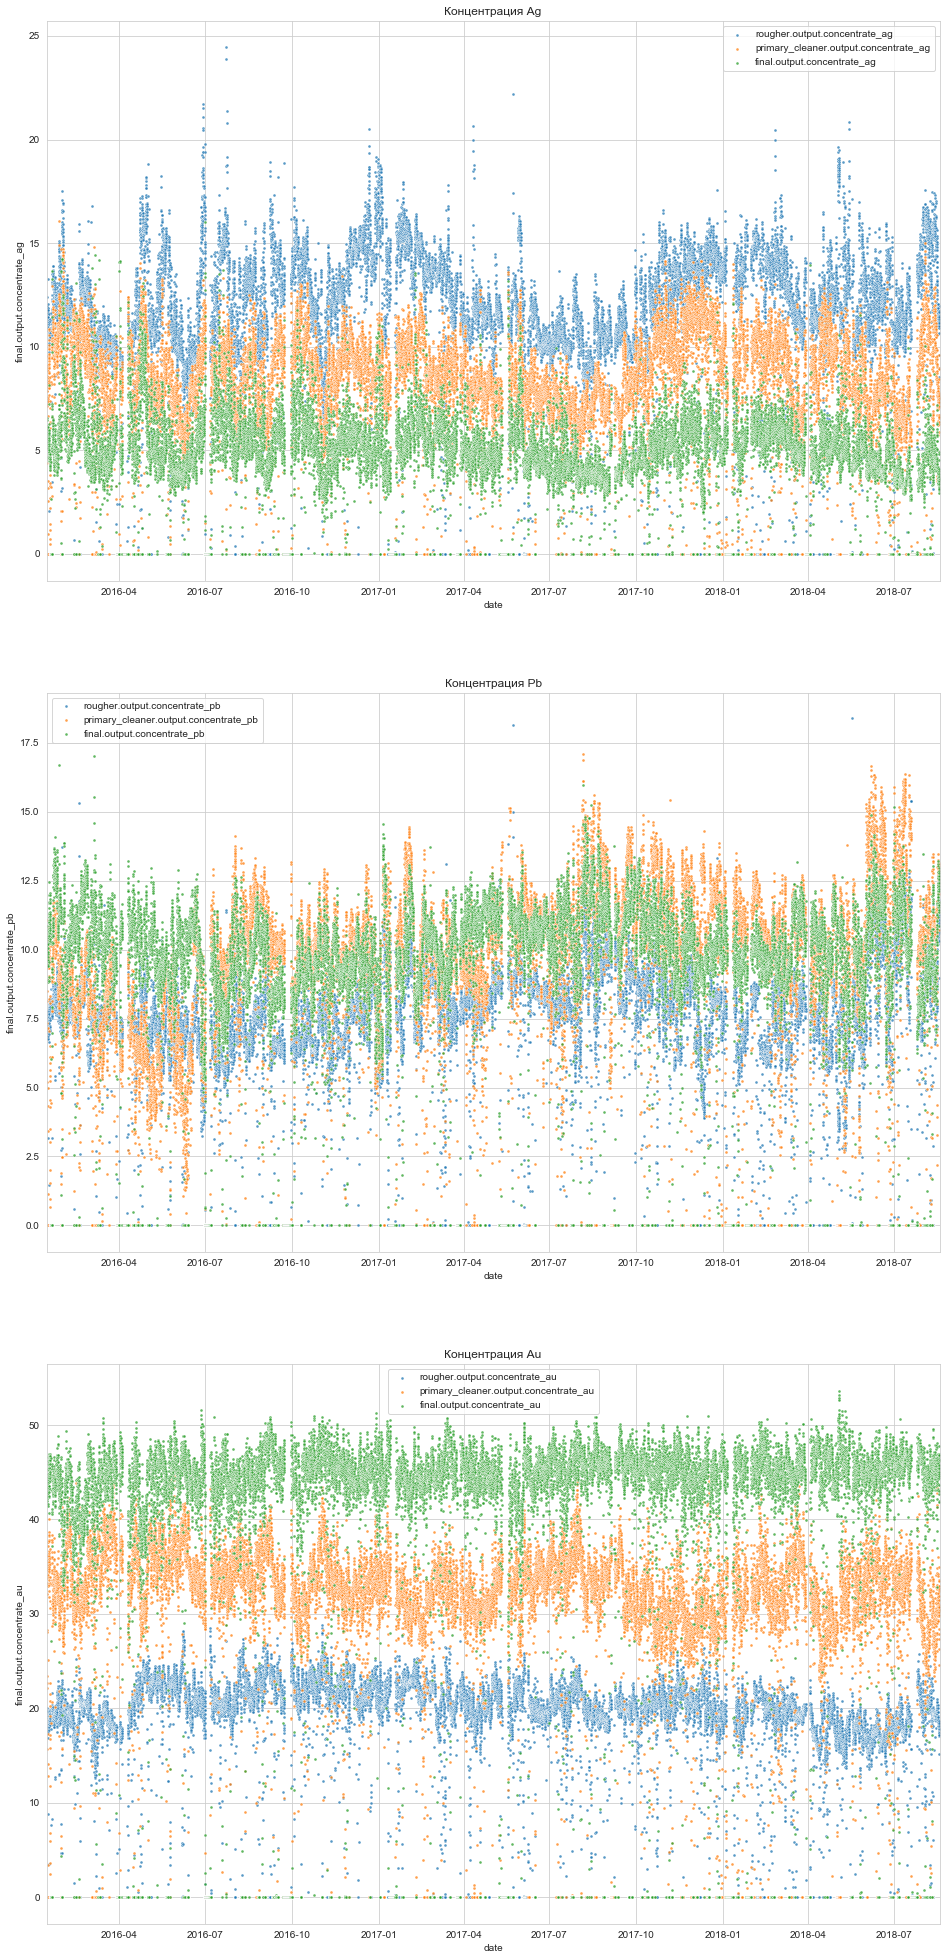

In [283]:
# Создаём списки с нужными концентрациями
concentrate_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag',
                  'final.output.concentrate_ag']

concentrate_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
                  'final.output.concentrate_pb']

concentrate_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
                  'final.output.concentrate_au']

# Создаём список со списками концентраций
concentrate_all = [concentrate_ag, concentrate_pb, concentrate_au]

# И делаем список названий
concentrate_titles = ['Концентрация Ag', 'Концентрация Pb', 'Концентрация Au']

# Добавим сетку на график
sns.set_style('whitegrid')

# Построим график через subplots
fig,ax = plt.subplots(len(concentrate_all),1, figsize=(16,35))

ax_i = 0
# Проходим одним циклом по списку списков концентраций, а внутри дополнительным циклом по металлу
for i in range(len(concentrate_all)):
    for j in range(len(concentrate_all[i])):
        
        a = sns.scatterplot(data = data_full, x = 'date', y = concentrate_all[i][j], 
                            marker = ".", alpha = 0.75, label = concentrate_all[i][j], 
                            ax = ax[ax_i], linewidth = 0.5)
    
    a.set_xlim(data_full['date'][0], data_full['date'][len(data_full)-1])
    a.set_title(concentrate_titles[i])
    ax_i += 1 

### Наблюдения по изменению концентраций
По данным графикам можно сделать следующие наблюдения:
1. Концентрация серебра стабильно снижается с каждым следующим этапом
2. В случае свинца сложно выявить какую-то однозначную закономерность. В зависимости от даты картина меняется. В целом, можно предположить, что концентрация свинца растёт на первом этапе очистки и незначительной уменьшается при финальной. Видимо, снижение концентрации свинца не является целью рассматриваемого технологического процесса.
3. Концентрация золота стабильно растёт с каждым этапом.
4. В каждом случае есть некоторое количество нулевых значений. Можно предположить, что в данных случаях измерения либо не проводились, либо были ошибочны.
5. В каждом случае есть группа "заниженных" концентраций относительно условного среднего уровня. Достоверно предположить, с чем именно это может быть связано, затруднительно. Вероятно, разное качество и состав начального сырья.

## 2.2. Размеры гранул сырья в обучающей и тестовой выборках.
Построим распределения гранул сырья в обучающей и тестовой выборках и сравним картины распределений.

In [273]:
# Аналогично предыдущему пункту создаём список нужных признаков
feed_sizes = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size', ]

# И список названий
feed_sizes_titles = ['Распределение гранул в исходном сырье',
                     'Распределение гранул в первичной очистке']

fig, ax = plt.subplots(2, 1, figsize=(16,16))

for i in range(2):
    a = sns.distplot(data_train[feed_sizes[i]], bins = 100, kde=False,
                label = 'Обучающая', ax=ax[i])
    a = sns.distplot(data_test[feed_sizes[i]], bins = 100, kde=False,
                label = 'Тестовая', ax=ax[i])
    ax[i].legend()
    a.set_title(feed_sizes_titles[i])

Распределения в обучающей и тестовой выборках выглядях схожими. Не видно каких-либо значительных и многочисленных выбросов, которые бы сильно выбивались из общего распределения. Для подтверждения сравним средние значения.

In [278]:
print('Гранулы исходного сырья')
print(data_train['rougher.input.feed_size'].mean())
print(data_test['rougher.input.feed_size'].mean())
print()
print('Гранулы первичной очистки')
print(data_train['primary_cleaner.input.feed_size'].mean())
print(data_test['primary_cleaner.input.feed_size'].mean())

Гранулы исходного сырья
60.09629463617998
56.33864421509223

Гранулы первичной очистки
7.3215705456935005
7.268669977430078


Отклонение среднего в случае исходного сырья не превышает 10%, а в случае первичной очистки средние практически равны. Считаю распределения условно совпадающими и пригодными к дальнейшей работе.

## 2.3. Суммарные концентрации и аномалии в них.

Для оценки распределений и поиска аномалий сперва нужно посчитать суммарные концентрации всех веществ: Ag, Sol, Pb, Au. Создадим новые столбцы в общем датасете.

In [282]:
# Добавим список с названиями признаков, где указана концентрация Sol на разных этапах технологии
concentrate_sol = ['rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol',
                  'final.output.concentrate_sol']

# Получим значения суммарной концентрации, сложив имеющиеся
data_full['rougher.output.concentrate_total'] = (
            data_full[concentrate_ag[0]] + data_full[concentrate_pb[0]] + 
            data_full[concentrate_sol[0]] + data_full[concentrate_au[0]])

data_full['primary_cleaner.output.concentrate_total'] = (
            data_full[concentrate_ag[1]] + data_full[concentrate_pb[1]] + 
            data_full[concentrate_sol[1]] + data_full[concentrate_au[1]])

data_full['final.output.concentrate_total'] = (
            data_full[concentrate_ag[2]] + data_full[concentrate_pb[2]] + 
            data_full[concentrate_sol[2]] + data_full[concentrate_au[2]])

# Проверим появление столбцов
display(data_full.head(2))

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   

   secondary_cleaner.state.floatbank6_a_air  \
0                                 14.151341   
1                                 13.998353   

   secondary_cleaner.state.floatbank6_a_level  \
0                                 -605.841980   
1                                 -599.787184   

   rougher.output.concentrate_total  primary_cleaner.output.concentrate_total  \
0                          66.42495                                 72.640924   
1                          67.01271                                 72.543485   

   final.output.concentrate_total  
0                       63.644396  
1                       63.957723  

[2 rows x 90 columns]

Столбцы появились. Построим распределение, аналогичное пункту 2.1

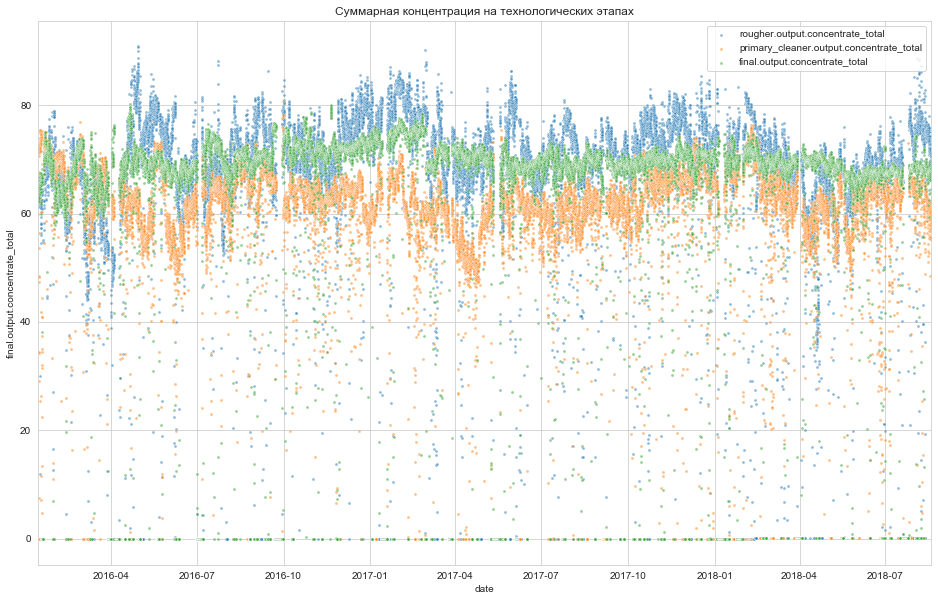

In [286]:
# Составляем список со столбцами суммарной концентрации на каждом этапе
concentrate_total_all = ['rougher.output.concentrate_total', 
                        'primary_cleaner.output.concentrate_total',
                        'final.output.concentrate_total']

plt.figure(figsize=(16,10))

for i in range(len(concentrate_total_all)):
    a = sns.scatterplot(data = data_full, x = 'date', y = concentrate_total_all[i],
         marker = ".", alpha = 0.5, label = concentrate_total_all[i], linewidth = 0.5)
a.set_xlim(data_full['date'][0], data_full['date'][len(data_full)-1])
a.set_title('Суммарная концентрация на технологических этапах') 
plt.show()

### Выводы по распределению суммарных концентраций

Как было выявлено в предыдущем пункте, наблюдаются 2 вида отличающихся значений:
1. Нули - предположили, что это может означать фактическое отсутствие измерений в данный момент. В реальности же концентрация вряд ли будет равна нулю.
2. Значения, существенно ниже "среднего" распределения. Здесь предположить сложнее, либо это особенность конкретной руды, либо погрешность датчиков.
По обоим пунктам требуется консультация с составителем данных или с экспертом в отрасли.

В любом случае, подобные данные скорее всего будут вредны для обучения модели и в рамках данного исследования требуется их удалить. Далее зададим пороги, по которым будем отделять аномалии.

### Удаление аномалий
Порог для определения аномалии будем задавать визуально. Пройдём последовательно по этапам очистки. 

#### Исходное сырьё:

In [290]:
# Задаём порог
ROUGHER_THRESHOLD = 50

plt.figure(figsize=(16,10))
a = sns.scatterplot(data = data_full, x = 'date', y = concentrate_total_all[0],
         marker = ".", label = concentrate_total_all[0], linewidth = 0.5)

# Указываем порог на графике
plt.axhline(y = ROUGHER_THRESHOLD, color = 'r', label = 'ROUGHER_THRESHOLD')
plt.legend()

a.set_xlim(data_full['date'][0], data_full['date'][len(data_full)-1])

plt.show()

#### Первичная очистка:

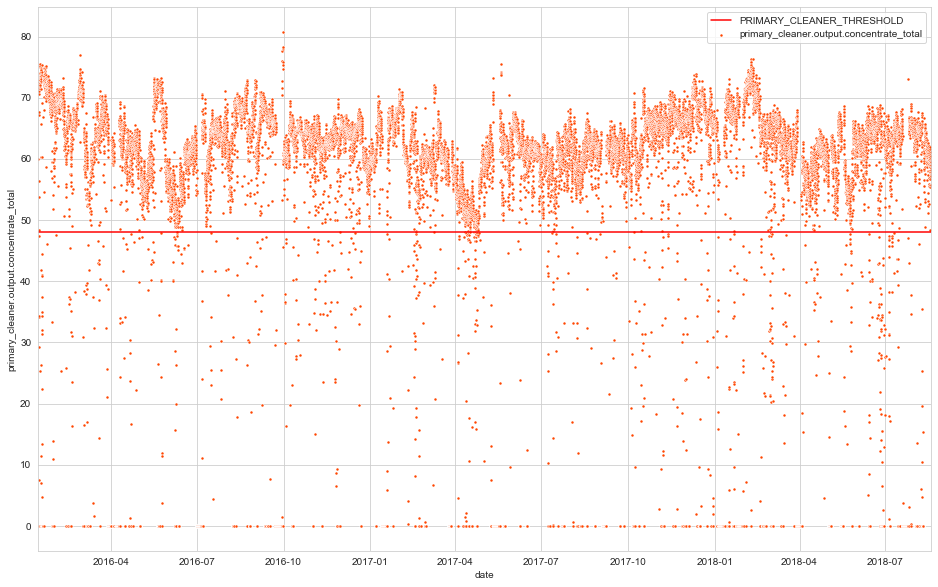

In [299]:
# Задаём порог
PRIMARY_CLEANER_THRESHOLD = 48

plt.figure(figsize=(16,10))
a = sns.scatterplot(data = data_full, x = 'date', y = concentrate_total_all[1],
         marker = ".", label = concentrate_total_all[1], linewidth = 0.5, color='orangered')

# Указываем порог на графике
plt.axhline(y = PRIMARY_CLEANER_THRESHOLD, label = 'PRIMARY_CLEANER_THRESHOLD', color = 'r')
plt.legend()

a.set_xlim(data_full['date'][0], data_full['date'][len(data_full)-1])

plt.show()

#### Финальная очистка:

In [301]:
# Задаём порог
FINAL_THRESHOLD = 60

plt.figure(figsize=(16,10))
a = sns.scatterplot(data = data_full, x = 'date', y = concentrate_total_all[2],
         marker = ".", label = concentrate_total_all[2], linewidth = 0.5, color='g')

# Указываем порог на графике
plt.axhline(y = FINAL_THRESHOLD, label = 'FINAL_THRESHOLD', color = 'r')
plt.legend()

a.set_xlim(data_full['date'][0], data_full['date'][len(data_full)-1])

plt.show()

### Обновляем данные без аномалий

In [312]:
# Создадим новые переменные с суффиксом processed (прошедшие предобработку)

# Обновляем полный датасет
data_full_processed = data_full[
    (data_full['rougher.output.concentrate_total'] > ROUGHER_THRESHOLD) &
    (data_full['primary_cleaner.output.concentrate_total'] > PRIMARY_CLEANER_THRESHOLD) &
    (data_full['final.output.concentrate_total'] > FINAL_THRESHOLD)]

# Обновляем обучающую выборку
data_train_processed = data_train[data_train['date'].isin(data_full_processed['date'])]

# И тестовую
data_test_processed = data_test[data_test['date'].isin(data_full_processed['date'])]

print('Оценим уменьшение выборок')
print()
print('Обучающая выборка')
print(f'Было до удаления аномалий {data_train.shape}')
print(f'Стало после               {data_train_processed.shape}')
print()
print('Тестовая выборка')
print(f'Было до удаления аномалий {data_test.shape}')
print(f'Стало после               {data_test_processed.shape}')

Оценим уменьшение выборок
Обучающая выборка
Было до удаления аномалий (14230, 87)
Стало после               (12194, 87)

Тестовая выборка
Было до удаления аномалий (5383, 55)
Стало после               (4798, 55)


В результате удаления аномалий потеряли около 14% обучающей выборки и около 11% тестовой. Потери считаю допустимыми, скорее всего удаление аномалий положительно скажется на качестве модели.

Посмотрим на распределение концентраций после удаления аномалий.

In [315]:
plt.figure(figsize=(16,7))

for i in range(len(concentrate_total_all)):
    a = sns.scatterplot(data = data_full_processed, x = 'date', y = concentrate_total_all[i],
         marker = ".", alpha = 0.5, label = concentrate_total_all[i], linewidth = 0.5)
a.set_xlim(data_full_processed['date'][0], data_full_processed['date'][len(data_full)-1])
a.set_title('Суммарная концентрация без аномалий') 
plt.show()

## 3. Построение модели

В данном случае нам требуется определить 2 целевых признака, для чего потребуется разработка двух отдельных моделей. Порядок действий будет следующий:
1. Подготовка функций для оценки работы двух моделей в параллели
2. Подготовка данных к обучению
3. Обучение модели для определения выхода чернового концентрата
4. Обучение модели для определения выхода финального концентрата
5. Подбор наиболее оптимального комплекта моделей с целью получить наименьшее значение total sMAPE.

## 3.1. Функция sMAPE

Напишем функцию для расчёта заданной метрики sMAPE:

In [317]:
# Функция для расчёта метрики по одному признаку
def sMAPE(y_test, y_predict):
    return (abs(y_test - y_predict) /  \
            ((abs(y_test) + abs(y_predict)) / 2) * 100).sum() / len(y_test)

# Функция для подсчёта общей метрики
def sMAPE_total(sMAPE_rougher , sMAPE_final):
    return sMAPE_rougher * 0.25 + sMAPE_final * 0.75

# Также воспользуемся возможностью sklearn использовать пользовательскую метрику
# как критерий качества обучения моделей

my_scorer = make_scorer(sMAPE, greater_is_better=True)

## 3.2. Обучение моделей

### 3.2.1 Доподготовка данных

В обучающей выборке признаков больше, чем в тестовой. Удалим из обучающей "лишние" признаки, чтобы уравнять выборки. Сравним размерности:

In [322]:
data_train_processed.shape[1], data_test_processed.shape[1]

(87, 55)

In [321]:
# Оставляем в обучающей выборке только те столбцы, которые есть в тестовой
data_train_noextras = data_train_processed[data_test_processed.columns]

# Проверяем результат
data_train_noextras.shape[1], data_test_processed.shape[1]

(55, 55)

Теперь разделим выборки на целевые и определяющие признаки:

In [324]:
# Из икса удаляем дату, как непринципиальный признак, и целевые
x_train = data_train_noextras.drop(columns = ['date', 'rougher.output.recovery', 'final.output.recovery'])

# Задаём целевые признаки - черновой и финальный выход
y_train_rough = data_train_noextras['rougher.output.recovery']
y_train_final = data_train_noextras['final.output.recovery']

# Аналогично с тестовой выборкой
x_test = data_test_processed.drop(columns = ['date', 'rougher.output.recovery', 'final.output.recovery'])

y_test_rough = data_test_processed['rougher.output.recovery']
y_test_final = data_test_processed['final.output.recovery']

# В качестве допобработки масштабируем определяющие признаки:
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

### 3.2.2. Линейная регрессия для Rough

В качестве метода кросс-валидации и перебора гиперпараметров будем использовать gridsearch в случае всех моделей.

In [325]:
# Задаём параметры для гридсёрча, указываем параметр n_jobs=-1 для подключения больше 1 ядра

LR_rough = GridSearchCV(estimator = LinearRegression(n_jobs = -1),  
                        param_grid = {'n_jobs':[-1]},
                        scoring = my_scorer, cv = 3, verbose = 1, n_jobs = -1)

# Обучаем модель
LR_rough.fit(x_train_scaled, y_train_rough)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=-1, normalize=False),
             iid='deprecated', n_jobs=-1, param_grid={'n_jobs': [-1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(sMAPE), verbose=1)

In [327]:
# Присваиваем модели получившиеся параметры

LR_rough_best = LR_rough.best_estimator_

Определим метрику sMAPE на обученной модели:

In [328]:
LR_rough_score = sMAPE(y_test_rough, LR_rough_best.predict(x_test_scaled))
print(f'sMAPE для линейной регрессии: {LR_rough_score}')

sMAPE для линейной регрессии: 126.1230155985213


### 3.2.3. Случайный лес для Rough

В данном случае есть возможность перебрать несколько гиперпараметров.

In [330]:
# Подбор параметров производился в несколько итераций, все итерации в коде не сохраняем

param_grid_RF_rough = {'n_estimators': [5, 10, 20],
                       'max_depth': [30, 33, 38, 40],
                       'min_samples_split' : [4, 5, 6, 7],
                       'min_samples_leaf': [2, 3, 4]}

In [331]:
%%time

RF_rough = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1, random_state=42), 
            param_grid= param_grid_RF_rough, scoring = my_scorer, cv=3, verbose=1, n_jobs= -1)

RF_rough.fit(x_train_scaled, y_train_rough)

print(RF_rough.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  8.3min finished


{'max_depth': 33, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 5}
CPU times: user 4.51 s, sys: 324 ms, total: 4.83 s
Wall time: 8min 17s


In [333]:
# Присваиваем модели лучшие гиперпараметры
RF_rough_best = RF_rough.best_estimator_

# Высчитываем метрику
RF_rough_score = sMAPE(y_test_rough, RF_rough_best.predict(x_test_scaled))
print(f'sMAPE для случайного леса: {RF_rough_score}')

sMAPE для случайного леса: 7.040402019131398


Лес показал значительно лучший результат.

### 3.2.4. Регрессия опорных векторов (SVR) для Rough

Попробуем применить новый алгоритм из модуля опорных векторов (SVM) - SVR. Для экономии времени подбора будем перебирать только значения параметров С и гамма.

In [334]:
%%time

param_grid_SVR_rough = {'C': [0.01, 0.1, 1], 'gamma': [10, 30, 70, 100]}

SVR_rough = GridSearchCV(estimator = SVR(), 
                         param_grid = param_grid_SVR_rough, 
                         scoring = my_scorer, cv = 3, verbose = 1, n_jobs = -1)

SVR_rough.fit(x_train_scaled, y_train_rough)

print(SVR_rough.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished


{'C': 0.01, 'gamma': 70}
CPU times: user 8.64 s, sys: 289 ms, total: 8.93 s
Wall time: 1min 31s


In [335]:
# Присваиваем модели лучшие гиперпараметры
SVR_rough_best = SVR_rough.best_estimator_

# Высчитываем метрику
SVR_rough_score = sMAPE(y_test_rough, SVR_rough_best.predict(x_test_scaled))
print(f'sMAPE для случайного леса: {SVR_rough_score}')

sMAPE для случайного леса: 4.256878415125331


Алгоритм SVR показал наилучший результат. Перейдём к подбору модели для признака чистового выхода.

### 3.2.5. Линейная регрессия для Final

In [336]:
LR_final = GridSearchCV(estimator = LinearRegression(n_jobs = -1),  
                        param_grid = {'n_jobs':[-1]},
                        scoring = my_scorer, cv = 3, verbose = 1, n_jobs = -1)

# Обучаем модель
LR_final.fit(x_train_scaled, y_train_final)

# Присваиваем модели получившиеся параметры
LR_final_best = LR_final.best_estimator_

LR_final_score = sMAPE(y_test_final, LR_final_best.predict(x_test_scaled))
print(f'sMAPE для линейной регрессии: {LR_final_score}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


sMAPE для линейной регрессии: 8.11544361552946


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished


При определении признака финального выхода линейная регрессия показала гораздо более лучший результат. Оценим 2 другие модели.

### 3.2.6. Случайный лес для Final

In [337]:
# Подбор параметров производился в несколько итераций, все итерации в коде не сохраняем

param_grid_RF_final = {'n_estimators': [5, 10, 20],
                       'max_depth': [30, 35, 40],
                       'min_samples_split' : [4, 7],
                       'min_samples_leaf': [2, 4]}

In [338]:
%%time

RF_final = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1, random_state=42), 
            param_grid= param_grid_RF_final, scoring = my_scorer, cv=3, verbose=1, n_jobs= -1)

RF_final.fit(x_train_scaled, y_train_final)

print(RF_final.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.2min finished


{'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 5}
CPU times: user 3.41 s, sys: 112 ms, total: 3.52 s
Wall time: 2min 10s


In [339]:
# Присваиваем модели лучшие гиперпараметры
RF_final_best = RF_final.best_estimator_

# Высчитываем метрику
RF_final_score = sMAPE(y_test_final, RF_final_best.predict(x_test_scaled))
print(f'sMAPE для случайного леса: {RF_final_score}')

sMAPE для случайного леса: 9.012284865317707


### 3.2.7. SVR для Final

In [340]:
%%time

param_grid_SVR_final = {'C': [0.01, 0.1, 1], 'gamma': [10, 30, 70, 100]}

SVR_final = GridSearchCV(estimator = SVR(), 
                         param_grid = param_grid_SVR_final, 
                         scoring = my_scorer, cv = 3, verbose = 1, n_jobs = -1)

SVR_final.fit(x_train_scaled, y_train_final)

print(SVR_final.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.3min finished


{'C': 0.1, 'gamma': 100}
CPU times: user 8.04 s, sys: 184 ms, total: 8.22 s
Wall time: 1min 25s


In [341]:
# Присваиваем модели лучшие гиперпараметры
SVR_final_best = SVR_final.best_estimator_

# Высчитываем метрику
SVR_final_score = sMAPE(y_test_final, SVR_final_best.predict(x_test_scaled))
print(f'sMAPE для случайного леса: {SVR_final_score}')

sMAPE для случайного леса: 7.518834839491291


В случае признака финального выхода наилучшим алгоритмом так же оказался SVR.

## Наилучшая модель и итоговая метрика sMAPE.

В случае обоих признаков лучшей моделью оказалась SVR. Ещё раз выведем полученные метрики.

In [342]:
print(f'Метрика SVR для Rough {SVR_rough_score}')
print(f'Метрика SVR для Final {SVR_final_score}')

Метрика SVR для Rough 4.256878415125331
Метрика SVR для Final 7.518834839491291


Используя эти метрики посчитаем итоговую по ранее написанной функции:

In [344]:
total_metric = sMAPE_total(SVR_rough_score, SVR_final_score)
print(f'Итоговая метрика sMAPE равна {total_metric}')

Итоговая метрика sMAPE равна 6.703345733399801


Дополнительно можем оценить точность получившихся моделей. Т.к. sMAPE похожа на среднюю абсолютную ошибку, мы можем сравнить её со средним значением по всему датасету и получить относительную точность.

In [350]:
# Для этого объединим целевые признаки из обучающей и тестовой выборки 
# в общую таблицу друг под другом и посчитаем их среднее значение

relative_accuracy_rough = SVR_rough_score / pd.concat([y_train_rough, y_test_rough]).mean()
relative_accuracy_final = SVR_final_score / pd.concat([y_train_final, y_test_final]).mean()

print('Относительная погрешность для чернового выхода {:.2%}'.format(relative_accuracy_rough))
print('Относительная погрешность для чистового выхода {:.2%}'.format(relative_accuracy_final))

Относительная погрешность для чернового выхода 5.55%
Относительная погрешность для чистового выхода 11.07%


## Общий вывод

В рамках проекта выполнены следующие действия:
1. Данные были загружены и изучены, проверены на правильность расчёта
2. Проведена обработка пропусков методами:
    - замена на рассчитанное значение
    - замена на медианы
    - применение вспомогательной модели линейной регрессии
    - допустимая часть признаков была удалена
3. Проведён исследовательский анализ данных:
    - Изучено изменение концентрации металлов в ходе технологического процесса
    - Изучены распределения гранул сырья
    - Определены и удалены аномалии в значениях суммарной концентрации веществ, сделано предположение о причине их возникновения. Для их уточнения требуется консультация с заказчиком (экспертом в отрасли)
4. Для двух целевых признаков (черновой и чистовой выход продукта) обучен ряд моделей машинного обучения, а именно:
    - Линейная регрессия
    - Модель случайного леса
    - Метод опорных векторов SVR
    В обоих случаях наиболее качественную метрику показал алгоритм SVR
5. Оценена относительная погрешность полученных моделей для двух признаков: 5.55% для чернового выхода продукта и 11.07% для чистового выхода продукта. Данные модели могут быть рекомендованы заказчику к рассмотрению и применению в бизнесе.